In [ ]:
## Grouping Imputation - using group by 
## to more intelligently fill in missing data

## using sales data: https://www.kaggle.com/c/rossmann-store-sales/data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

sourceFile = 'C:/Users/jtcUser/Documents/Systems/Training/PandasCourse/Section5/files/train.csv'

## note: low_memory=False means load the whole datafame at once
dfo = pd.read_csv(sourceFile, low_memory=False, parse_dates=["Date"])
dfo.head(2)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1


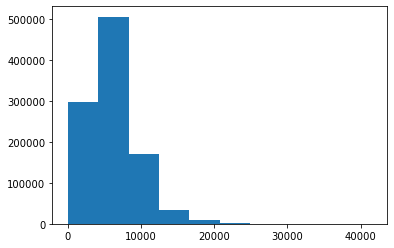

In [4]:
plt.hist(dfo.Sales);

(844392, 9)


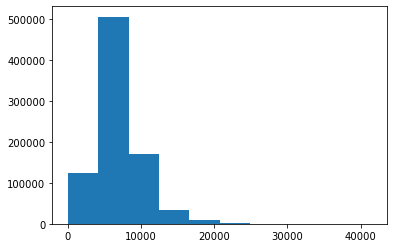

In [4]:
## Only include open stores in the new dataframe
## only the rows where the value in the "Open" column is equal to 1.

df = dfo[dfo.Open == 1].copy()
plt.hist(df.Sales)
print(df.shape);

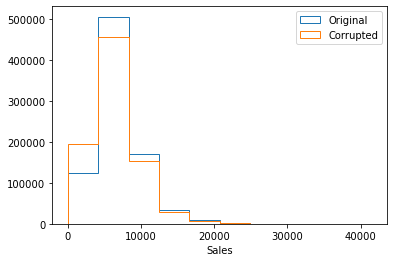

In [12]:
## Use Numpy to generate a random boolean mask
## with the same length as dataframe df
## Creates an array of integers between 0 and 9
## with the same number of rows in df
## then compares the array elements to 0
## resulting in a boolean mask where true indicates corresponding element
## is equal to 0  (WTF, that is too much in one line)
mask = np.random.choice(10, size=df.shape[0]) == 0

## create a new column "NewSales" in the dataframe df
df["NewSales"] = df.Sales.copy()

## Set the values in NewSales column to np.nan where mask is true
## in other words it corrupts the sales data by replacing them with NaN
df.loc[mask, "NewSales"] = np.nan

## Creates a histogram of the original sales data and displayed as a step plot
plt.hist(df.Sales, label="Original", histtype="step")

## creates a histogram of the NewSales data after corruption
## fillna(0) used to fill NaN values in NewSales column with 0 before plotting
plt.hist(df.NewSales.fillna(0), label="Corrupted", histtype="step")

## add the legend to the plot
plt.legend(), plt.xlabel("Sales");

In [ ]:
## Transform - similar to apply, 
## but it has to return a series the same size as the input.

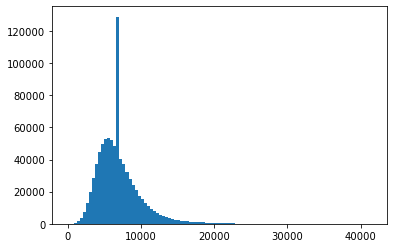

In [13]:
## creates a new Series called test_fix. 
## It takes the "NewSales" column from the DataFrame df and 
## applies a transformation using the transform method
## The transformation is a lambda function that fills the missing (NaN) values 
## in the column x with the mean value of the non-missing values in the same column.
test_fix = df.NewSales.transform(lambda x: x.fillna(x.mean()))

## creates a histogram of the test_fix Series using plt.hist(). 
## bins=100 argument divides the data into 100 bins for the histogram
## the additional bins provide more granularity
plt.hist(test_fix, bins=100);

Not the best...

From previous examples, we know that some stores are far above others, and that sales vary significantly over the day of week. But maybe its good enough if we take those two factors into consideration.

In [9]:
dfg = df.groupby(["Store", "DayOfWeek"])
dfg.median().head()

Sales  Customers  Open  Promo  SchoolHoliday  NewSales
Store DayOfWeek                                                         
1     1          5302.5      581.0   1.0    1.0            0.0    5280.0
      2          4640.5      549.5   1.0    1.0            0.0    4628.5
      3          4549.5      533.0   1.0    1.0            0.0    4310.0
      4          4380.0      525.0   1.0    1.0            0.0    4356.0
      5          4651.0      552.0   1.0    1.0            0.0    4651.0

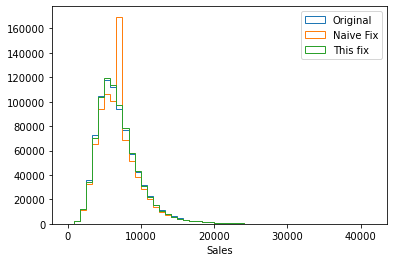

In [11]:
## creates a new Series called test_fix2. 
## It takes the "NewSales" column from the DataFrame dfg and 
## applies a transformation using the transform method. 
## The transformation is defined as a lambda function 
## that fills the missing (NaN) values in the column x 
## with the mean value of the non-missing values in the same column. 
test_fix2 = dfg.NewSales.transform(lambda x: x.fillna(x.mean()))

## creates a dictionary named opts that stores the options for 
## plotting the histograms.
opts = {"histtype": "step", "bins": 50}

## **opts syntax unpacks the opts dictionary and 
## passes its contents as keyword arguments to the 
## plt.hist() function
plt.hist(df.Sales, label="Original", **opts)
plt.hist(test_fix, label="Naive Fix", **opts)
plt.hist(test_fix2, label="This fix", **opts)
plt.legend(), plt.xlabel("Sales");

Better! We could improve this even further if we wanted. Sales is a skewed distribution, so better for us to use the median than the mean. The performance of the previous days - above or below the mean - might be a good indicator for performance. But now we're heading into machine learning territory, which is too vast a topic to cover here!